# Safety Week 1: Content Moderation 


<div style="border-left: 6px solid rgba(69, 157, 185, 1); border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">How to use this notebook</p>
    <div style="padding: 0 0 2px 10px;">
        
Simply read the text and **follow the instructions**.  
This notebook contains **code cells**, which can be modified and must be **executed** to see the result of their content.  
To execute a cell, select it and click on the play button (▶) in the tool  bar, or type `Shift + Enter` or `Ctr + Enter`.  

As the variables contained in a cell are stored in memory, the **order of execution** of the cells is important !  

</div></div>

Notebook by Maxime Lelièvre and the Responsible software team (2024).

Exercises adapted from "Content Moderator Assignment" by Julie Jarzemsky and Casey Fiesler, under license CC BY 4.0.<br/>
Source: https://www.internetruleslab.com/ethicsbased-computer-science-assignments#content-mod<br/>
Reference: Jarzemsky, J., Paup, J., & Fiesler, C. (2023). "This Applies to the Real World" : Student Perspectives on Integrating Ethics into a Computer Science Assignment. SIGCSE 2023, Toronto, ON, Canada. https://doi.org/10.1145/3545945.3569846

Except where otherwise noted, the content of this notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution International License</a> (CC BY 4.0 International).<br/>
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0;margin-top:10px;" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>

***
# Welcome to Week 1 exercise's session of Responsible Software!

The internet has revolutionized the way we access and share information, but it has also led to the proliferation of harmful content such as hate speech, fake news, cyberbullying, and violent extremism. 
As a result, detecting and removing harmful content has become a pressing challenge for online platforms and governments alike. 

In this exercise, we will look at several content moderation algorithms that aim to detect offensive content and will discuss the potential shortcomings of such methods and the potential misuse of existing software products.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Learning Goals</p>
    <div style="padding: 0 0 2px 10px;">

**What will be covered:**
- *Part 1*: Basic filtering systems for content moderation (keyword matching, sentiment analysis) on a toy example
- *Part 2*: More advanced filtering systems for content moderation (natural language processing and machine learning) on realistic data from Twitter

**By the end of the session you will be able to:**
- ✅  Implement a basic filtering system for content moderation and evaluate its quality
- ✅  Compute and interpret the accuracy score 
- ✅  Compute and interpret a confusion matrix 
- ✅  Describe the advantages and disadvantages of each filtering systems covered  

</div></div>
<br/>

---

# Part 1 : Cats and dogs

## The scenario

Catter is a social media platform built by and for cats.  The cats’ platform has recently been getting spammed by dogs, so they have decided to remove all mentions of dogs from their platform entirely.  However, cats are not great at programming.  They need your help in removing all of the dog content from their platform and gathered for you some text examples in csv files.

## Part 1.1 Keyword Matching

### *Task 1: Remove posts with the word "dogs"*

The first method cats use to moderate content is keyword matching. They ask you to create a program that analyze each sentence and label them.

You receive a sample file with a list of sentences to filter.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Execute this cell to see the content of the file:   

</div></div>

In [1]:
import pandas as pd
import os
# Pandas reads the contents of the file and stores it into a "DataFrame", which is a table
path_catDogText = os.path.join('res', 'catDogText.csv')
sentences = pd.read_csv(path_catDogText, sep = ';')
sentences

text
0                    Cats rule, dogs drule.
1                       Cats are the worst.
2  Dogs are the best pet you could ask for.
3             Dogs are a man's best friend.
4               Cats are smarter than dogs.
5                    Cats are the best pet.
6           Cats can jump higher than dogs.
7                 Cats are the bee's knees.
8                    All dogs go to heaven.
9                        Dogs are not cool.

To implement your filter, you will proceed in two steps:
1. Create a function that indicates with a boolean if a given sentence contains a banned word
1. Loop over the sentences in the sample file and apply your function so the resulting boolean is stored in a second column of the dataframe

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 10px 10px;">

Complete the function `has_banned_word` below so that:
    
* It returns whether or not a sentence contains the banned word: if the sentence contains the banned word, the function should return `True`, otherwise `False`. 
* Your code should catch plural cases of the word ("dogs") as well as singular.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Notes</p>
    <div style="padding: 0 0 2px 10px;">

- Python has an operator `in` that allows to check whether an item is in a list, e.g. `"thing" in "list of things"` will return `True`. Check [this page](https://www.w3schools.com/python/python_operators.asp#:~:text=Python%20Membership%20Operators) for more details.
- Check the function [str.lower()](https://python-reference.readthedocs.io/en/latest/docs/str/lower.html)
        
</div></div></div></div>

In [2]:
def has_banned_word(sentence_to_scan, banned_word):
    """ has_banned_word checks whether sentence_to_scan contains the banned_word
    Arguments:
    - sentence_to_scan: a string of words to scan
    - banned_word: a string to scan for
    Returns:
    - True if the text contains any instances of the banned_word
    - False otherwise
    """
    ### YOUR CODE HERE
    result = banned_word.lower() in sentence_to_scan.lower() # SOLUTION
    ### END OF YOUR CODE
    
    return result

Test your function:

In [3]:
from res.tests import *
test(has_banned_word)

🆗 Tests passed ! =)


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Complete the cell below so that:
- Each sentence is analyzed by the filter
        
</div></div>

In [4]:
# banned word to look for
banned = "dogs"

# iterating over the rows in the dataframe
for i, row in sentences.iterrows():
    # getting the sentence in that row
    sentence = row['text']
          
    ### YOUR CODE HERE
    # checking whether the sentence contains the banned word
    contains_banned_word = has_banned_word(sentence, banned) # SOLUTION
    ### END OF YOUR CODE
    
    # Storing the result in the table
    sentences.at[i, 'contains_banned_word'] = contains_banned_word 

# show the result
sentences.style.apply(lambda r: ['color: red'] * len(r) if r['contains_banned_word'] else [''] * len(r), axis=1)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

Are you satisfied with the results of your filter?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
We can't be very happy about this filter because:
- some negative statements are not caught by this solution, e.g. "Cats are the worst".
- some positive statements are caught by the filter where they should not be, e.g. "Cats are smarter than dogs". 

</div></div>

### *Task 2 : Matching a list of banned words*
 
The dogs have started to get creative while putting content onto Catter, using slang like “doggo”, “dawg”, etc.  To fix this, the developers of Catter are maintaining a list of words to remove.

In [5]:
def has_word_from_list(sentence_to_scan, list_of_words):
    """ has_word_from_list checks whether the sentence_to_scan contains any words from the list_of_words

      Arguments:
      - sentence_to_scan: An array of words to scan
      - list_of_words: The list of banned words to scan for (lowercase)

      Returns:
      - True if sentence_to_scan contains any words from the list_of_words
      - False otherwise
    """
    for banned_word in list_of_words:
    ### YOUR CODE HERE
        # BEGIN SOLUTION
        if has_banned_word(sentence_to_scan, banned_word):
                return True 
    return False 
        # END SOLUTION

Test your function:

In [6]:
test(has_word_from_list)

🆗 Tests passed ! =)


Here is a list of the slang words that dogs start to use:

In [7]:
# retrieving the list of words that are banned
path_bannedWords = os.path.join('res', 'bannedWords.csv')
list_of_banned_words = pd.read_csv(path_bannedWords, sep = ';')['text']
list_of_banned_words

0      dawgs
1        dog
2       dogs
3      doggo
4    doggies
Name: text, dtype: object

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">
        
Complete the cell below so that:
- Each sentence is analyzed by the filter

</div></div>

In [8]:
# reading the test file with slang
path_dog_variants = os.path.join('res', 'dogVariants.csv')
sentences = pd.read_csv(path_dog_variants, sep = ';')
  
# iterating over the rows in the dataframe, `i` is the index of the row, and `row` contains the row itself 
for i, row in sentences.iterrows():
    # getting the sentence in that row
    sentence = row['text']
          
    ### YOUR CODE HERE
    # checking whether the sentence contains the banned word
    contains_banned_word = has_word_from_list(sentence, list_of_banned_words) # SOLUTION
    ### END OF YOUR CODE
    
    # Storing the result in the table
    sentences.at[i, 'contains_banned_word'] = contains_banned_word 

# show the result
sentences.style.apply(lambda r: ['color: red'] * len(r) if r['contains_banned_word'] else [''] * len(r), axis=1)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

Are you satisfied with the results of your filter?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

While we have some of the same problems as before, the filter seems to be a bit more robust.  
It is a step forward, but we can't be really happy about this filter.

</div></div>

***
## Part 1.2 Sentiment Analysis
The dogs are now working to spam Catter with negative statements about cats.

To address this issues, we will use the `NLTK` toolkit, a popularly used library for processing texts. It provides a number of practical tools for language processing and includes several corpora and lexical resources(documentation [here](https://www.nltk.org/)). 

We will use a **sentiment analyzer** developed for social media text called [VADER](https://ojs.aaai.org/index.php/icwsm/article/view/14550), which means Valence Aware Dictionary and sEntiment Reasoner. This tool is rule-based and it relies on a lexicon of sentiment-related words, i.e. a list of word with associated sentiment ratings (positive or negative).  

In the following cell, we first initialize the sentiment analyzer `SentimentIntensityAnalyzer` and show an example of the function `polarity_scores`.

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# We instantiate the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Example of its usage
ps = sia.polarity_scores("This person is good")
ps

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/matteo/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

A polarity_score consists of 4 values: `neg` *(negativity)*, `neu` *(neutrality)*, `pos` *(positivity)* which all add up to 1, and the `compound`, which is an overall normalized score that ranges from -1 *(very negative)* to 1 *(very positive)*.  

From the result of the analyzer, you can extract individual scores in the following way:

In [10]:
ps['neu']

0.508

### *Task: Detect negative statements*

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Write the function `is_negative_statement` so that:
- The statement is evaluated using `sia`.
- The function returns `True` if the statement is negative, `False` otherwise.

</div></div>

In [11]:
def is_negative_statement(statement, sia=sia):
    """ is_negative_statement checks whether the statement has a negative compound polarity score.

    Arguments:
    - sia: the sentiment analyzer, initialized in main function
    - statement: the string to analyze

    Returns:
    - True if the statement is negative
    - False if the statement is neutral or positive
    """
  
    ### YOUR CODE HERE
    result = sia.polarity_scores(statement)['compound'] < 0 # SOLUTION
    ### END OF YOUR CODE

    return result

In [12]:
test(is_negative_statement)

🆗 Tests passed ! =)


Let's see the new sentences we have and put them into a panda dataframe.

In [13]:
path_catNegativity = os.path.join('res', 'catNegativity.csv')
sentences = pd.read_csv(path_catNegativity, sep = ";")
print(f'Number of sentences : {len(sentences)}')
sentences.head() #shows the first 5 rows of the dataframe

Number of sentences : 6


text
0           cats are the worst!
1                   I hate cats
2                    Ewwww cats
3  Cats are so cute and amazing
4            Dogs are the worst

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the cell below so that:
- Each sentence is analyzed by the sentiment analyzer

</div></div>

In [14]:
for i, row in sentences.iterrows():
    sentence = row['text']
    
    ### YOUR CODE HERE
    is_negative = is_negative_statement(sentence, sia) # SOLUTION
    ### END OF YOUR CODE

    sentences.at[i, 'negativity'] = is_negative
sentences.style.apply(lambda r: ['color: red'] * len(r) if r['negativity'] else [''] * len(r), axis=1)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

Did the sentiment analyzer filter out all sentences correctly ?
* [ ] Yes  
* [ ] No 

***
If it was a social media platform for humans instead of cats, what could be a potential implication if this model was used to filter out toxic content ?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

*Quizz answer:*  
No, some negative sentences have not been filtered.
***
The platform would not be effective to prevent any form of harassment, and would sometimes wrongly flag innocent messages.

</div></div>

## Conclusion from Part 1
You have now practiced a few basic filtering techniques (keywords matching, sentiment analysis) on the example of Catter, and you have seen their limits.  
In the next part of the exercise, you will practice with more realistic data that comes from Twitter, and apply more advanced techniques of Natural Language Processing (NLP) that are now widely used in the latest moderation systems.

***
# Part 2: Twitter

This part uses real world data coming from Twitter and you will practice using Natural Language Processing (NLP) techniques in two tasks :

- **Task 1 :** filter out offensive content based on an opinion lexicon, and learn how to use the *accuracy* score and the *confusion matrix*
- **Task 2 :** use a Machine Learning model to detect offensive content, and evaluate its performance

## The dataset

Let's first have a look at the [dataset](https://huggingface.co/datasets/tweet_eval) which is a collection of tweets from Twitter by loading it with the [*load_dataset*](https://huggingface.co/docs/datasets/loading) method of the library, specifying that we only want to load the data about offensive content. 
After loading it, we print it to see the structure of the data.

Note: this cell may take a few seconds to execute.

In [15]:
from datasets import load_dataset

# dataset that we will use to evaluate our model
dataset = load_dataset("tweet_eval", "offensive")
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 11916
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 860
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1324
    })
})

As can be seen from the structure, the data is separated into three subsets, which are called **train**, **validation**, and **test** data. This is a common approach in machine learning where the data is split into different subsets for different tasks. Basically, the train data is used to develop our models, the validation data is used to compare different models, and the test data is used to evaluate our model to know if our approach of content filtering is good. 

You can access a datapoint from on of the subsets using array indexing. The cell below displays the first tweet among the list of tweets in the training dataset as an example.

In [16]:
dataset["train"][0]

{'text': '@user Bono... who cares. Soon people will understand that they gain nothing from following a phony celebrity. Become a Leader of your people instead or help and support your fellow countrymen.',
 'label': 0}

As you see above, a datapoint is a [dictionary](https://realpython.com/python-dicts/) with 2 keys : text and label. The key `text` is mapped with the tweet and the key `label` is mapped with the value 0 or 1 (non-offensive or offensive respectively). These labels represent the **ground truth** which has been determined by experts during the data labelling (more information about it [here](https://aws.amazon.com/fr/sagemaker/data-labeling/what-is-data-labeling/#:~:text=In%20machine%20learning%2C%20data%20labeling,model%20can%20learn%20from%20it.)) and will allow us to check if our filter works or not.


Watch out that the tweet above has been labelled as non-offensive !

## Part 2.1: Using an opinion lexicon

In this exercise, we will first implement a simple method to identify harmful content by identifying whether the text contains negative words. Instead of building and using our own list of negative words, we will use a lexicon provided by the [NLTK library](https://www.nltk.org/) that we have started to use in the previous section. A lexicon is a kind of dictionary that contains a list of language elements associated to other information. The lexicon we will use has been built by the [Computer Science University of Illinois at Chicago](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html#lexicon) and contains around 6800 words along with the opinion (negative or positive) they represent.

First we need to load the list of negative words.

In [17]:
import nltk
from nltk.corpus import opinion_lexicon

# Retrieve the list of negative words
nltk.download('opinion_lexicon')
negative_words = opinion_lexicon.negative()

# Show a few examples
negative_words

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/matteo/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


['2-faced', '2-faces', 'abnormal', 'abolish', ...]

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

What is the cell below doing ? To figure it out, comment very briefly what each line is doing!

</div></div>

In [18]:
# BEGIN SOLUTION NO PROMPT
# Function that tests whether a text contains one of the negative words
def has_negative_word(negative_words, text):
    # Iterate over all negative words
    for negative_word in negative_words:
        # Test whether the text contains a negative word - we put the text in lower case because the lexicon is in lower case
        if negative_word in text.lower():
            # Interrupt the loop and return 1 as soon as we find one negative word
            return 1
    # Return 0 if we didn't find any negative word
    return 0

# Initialize two lists for storing the predictions and the labels
predictions = []
labels = []

# Iterate over all texts in the test dataset
for sample in dataset["test"]:
    # Store the result of the function indicating whether the sample contains a negative words
    predictions.append(has_negative_word(negative_words, sample["text"]))
    # Store the actual label 
    labels.append(sample["label"])

# Build a two-column dataframe with the results
comparisons = pd.DataFrame({'prediction': predictions, 'label': labels})
# END SOLUTION
""" # BEGIN PROMPT
def has_negative_word(negative_words, text):
    for negative_word in negative_words:
        if negative_word in text.lower():
            return 1
    return 0

predictions = []
labels = []

for sample in dataset["test"]:
    predictions.append(has_negative_word(negative_words, sample["text"]))
    labels.append(sample["label"])

comparisons = pd.DataFrame({'prediction': predictions, 'label': labels})
"""; # END PROMPT

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Quizz time !</p>
    <div style="padding: 0 0 2px 10px;">

What is the cell above doing ?
- [ ] It computes the accuracy of our basic content moderation method checking the existence of any negative words
- [ ] It compares the labels with the predictions of the model
- [ ] It gives the prediction of our basic content moderation method for each sample of the test set

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
It gives the prediction of our basic content moderation method for each sample of the test set

</div></div>

Let's have a look at a few rows from the result:

In [19]:
comparisons.sample(5) # Draws 5 random rows among the dataframe

prediction  label
296           1      1
496           0      0
556           0      0
247           1      1
309           1      0

### *Task 1: Compute the accuracy*

We can now evaluate our basic method by comparing our predictions with the actual labels. The accuracy score is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right. Formally, accuracy has the following definition:

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Using the ``comparisons`` dataframe, compute the accuracy of our filtering method.

Note:
* you can identify which rows have equal values in two columns of a dataframe with: ``dataframe[dataframe["columnA"] == dataframe["columnB"]]``
* you can obtain the length of a dataframe (number of rows) using: ``len(dataframe)``

</div></div>

In [20]:
def compute_accuracy_score(comparisons):
    """ Computes the accuracy score for a dataset with two columns

    Arguments:
    - comparisons: a dataframe with two columns labelled 'prediction' and 'label'

    Returns:
    - accuracy: proportion of correct predictions among all rows in the dataset
    """
    
    ### YOUR CODE HERE
    correct_pred = len(comparisons[comparisons["prediction"] == comparisons["label"]]) # SOLUTION
    total_pred = len(comparisons) # SOLUTION

    accuracy = correct_pred / total_pred # SOLUTION
    ### END OF YOUR CODE
    
    return accuracy

print(f'Accuracy : {compute_accuracy_score(comparisons)}')

Accuracy : 0.4232558139534884


To know whether your computation is correct, you can compare with the result given by [scikit-learn](https://scikit-learn.org/stable/), a popular machine learning library, which provides an easy way to compute the accuracy.  
The function [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) takes two arguments:
* first the ground truth
* second the predictions

Execute the code cell below to see the result:

In [21]:
from sklearn.metrics import accuracy_score
print(f'Accuracy : {accuracy_score(comparisons["label"], comparisons["prediction"])}')

Accuracy : 0.4232558139534884


As we can see, our basic method is only correct for about 42% of the samples.  

### *Task 2: Generate the confusion matrix*

To get a better idea of the errors of our approach, we can plot the **confusion matrix** of our results.  
It provides us with a way to evaluate how well the model is doing at this task by comparing the result provided by the model (predicted label) and the ground truth (actual label). It breaks down performance into four categories: true positives, true negatives, false positives, and false negatives: 

- A **true positive (TP)** is when the model correctly identifies offensive content as offensive. 
- A **false positive (FP)** is when the model incorrectly identifies non-offensive content as offensive. This is sometimes referred to as a "false alarm" because the model is sounding the alarm for content that is not actually offensive.
- A **true negative (TN)** is when the model correctly identifies non-offensive content as non-offensive.
- A **false negative (FN)** is when the model incorrectly identifies offensive content as non-offensive. This is sometimes referred to as a "miss" because the model is missing the offensive content that it was supposed to identify. 

The confusion matrix looks like this:

<table style="align: left;">
 <tr>
  <th rowspan="2">&nbsp;</th>
  <th>&nbsp;</th>
  <th colspan="2">Predicted label</th>
 </tr>
 <tr>
  <th style="border-right:1px solid rgba(221, 221, 221, 1);border-bottom:1px solid rgba(221, 221, 221, 1);">&nbsp;</th>
  <th style="border-bottom:1px solid rgba(221, 221, 221, 1);">Positive (1)</th>
  <th style="border-bottom:1px solid rgba(221, 221, 221, 1);">Negative (0)</th>
 </tr>
 <tr>
  <th rowspan="2">Actual label</th>
  <th style="border-right:1px solid rgba(221, 221, 221, 1);">Positive (1)</th>
  <td>True Positives</td>
  <td>False Negatives</td>
 </tr>
 <tr>
  <th style="border-right:1px solid rgba(221, 221, 221, 1);">Negative (0)</th>
  <td>False Positives</td>
  <td>True Negatives</td>
 </tr>
</table>

Based on the definitions above, for binary classification, accuracy can also be calculated as follows: 

$$\text{Accuracy} = \frac{\text{TP + TN}}{\text{TP + TN + FP + FN}}$$

By looking at the numbers in each category of the confusion matrix, we can get a better sense of how well the model is performing overall. 

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the function `compute_confusion_matrix` below: read the example provided for the true positive rate, then use the same syntax for the other parts of the confusion matrix.

</div></div>

In [22]:
def compute_confusion_matrix(comparisons):
    """ Computes the four elements of the confusion matrix: TP, FP, TN and FN

    Arguments:
    - comparisons: a dataframe with two columns labelled 'prediction' and 'label'

    Returns:
    - TP, FP, TN and FN (in this order)
    """

    ### YOUR CODE HERE
    # reminder: offensive = 1 = positive
    TP_dict = {"prediction": 1, "label": 1} 
    TN_dict = {"prediction": 0, "label": 0} # SOLUTION
    FP_dict = {"prediction": 1, "label": 0} # SOLUTION
    FN_dict = {"prediction": 0, "label": 1} # SOLUTION
    ### END OF YOUR CODE
    
    # retrieve the number of elements that respects the condition on `prediction` and `label`
    TP = comparisons[(comparisons['prediction'] == TP_dict['prediction']) & (comparisons['label'] == TP_dict['label'])].shape[0]
    TN = comparisons[(comparisons['prediction'] == TN_dict['prediction']) & (comparisons['label'] == TN_dict['label'])].shape[0]
    FP = comparisons[(comparisons['prediction'] == FP_dict['prediction']) & (comparisons['label'] == FP_dict['label'])].shape[0]
    FN = comparisons[(comparisons['prediction'] == FN_dict['prediction']) & (comparisons['label'] == FN_dict['label'])].shape[0]
    
    return TP,FP,TN,FN

In [23]:
test(compute_confusion_matrix)

🆗 Tests passed ! =)


Run the following cell which plots your implementation of the confusion matrix and visualize the results !

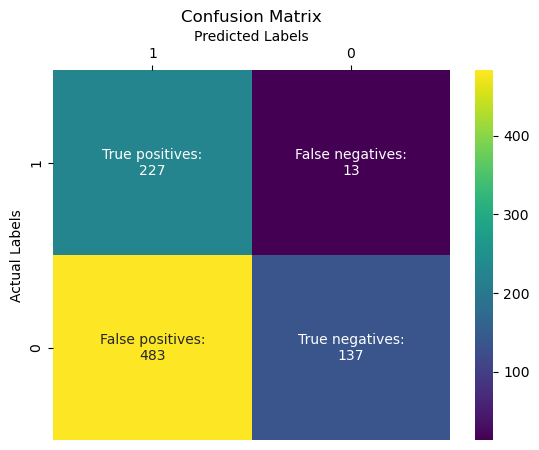

In [24]:
TP, FP, TN, FN = compute_confusion_matrix(comparisons)
draw_confusion_matrix(TP, FP, TN, FN)

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

Q1) What conclusion can you make from the confusion matrix ? 

Q2)  Where do you think the high number of false positives come from ?
*Hint :* Try to think about tweets that could be false positives.

Q3) Do you think the model successfully differentiates offensive from non-offensive tweets ? 

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

Q1) From the confusion matrix, we see that the number of false positives is very high, which means that the model is over labelling in favor of offensive content, i.e. the model censures a lot of content.

Q2) The high number of false positives might come from tweets having banned words but without the purpose of being offensive, like when we do sarcasm. Innocent tweets are thus flagged as offensive ones.

Q3) The model doesn't successfully differentiates offensive from non-offensive tweets, as it considers most non-offensive tweets as offensive ones 

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Quizz time !</p>
    <div style="padding: 0 0 2px 10px;">

In general, a toxic content filtering algorithm should always minimize the number of :
- [ ] True Positive and True Negative
- [ ] True Positive and False Positive
- [ ] True Positive and False Negative
- [ ] True Negative and False Positive
- [ ] True Negative and False Negative
- [ ] False Positive and False Negative

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

**False Positive and False Negative**, as True Positives & Negatives are correctly labeled samples.

</div></div>

We have seen with the accuracy and confusion matrix that this filter is not effective at detecting offensive content: while it may protect users from most harmful content (high number of True Positives), it actually harms users by **censoring them** (very high number of False Positives), therefore infringing on their freedom of speech.

We have to mention here that lexicons are usually not used in that way. They are important elements of content moderation approaches that are based on Machine Learning, which we are going to explore in Part 2.2. However, this first simple filter has allowed you to practice two essential tools for evaluating the quality of such software: the **accuracy score** and the **confusion matrix**.

<!-- 
Other questions to think about:
* What are some potential problems with using a simple negative word filter to detect offensive content?
* How would the algorithm perform on different types of text, such as social media posts, news articles, or academic papers? Would the algorithm be equally effective across different domains? 
-->

## Part 2.2: Using a deep learning model

In this exercise, we will **use a deep learning model** to detect offensive content.  
It would be highly inefficient to have you train your own deep learning model, which is why we have created one for you by "fine-tuning" an existing language model called [DistilBERT base model (uncased)](https://huggingface.co/distilbert/distilbert-base-uncased) on the `tweet_eval` dataset. (More information on [fine tuning here](https://ai.plainenglish.io/fine-tuning-in-deep-learning-909666d4c151) - this approach of post-training an existing model has shown significant improvement over training a new model from scratch on the new data). 
We have made the fine-tuned model available on the Hugging Face library: https://huggingface.co/RS-course/model-safety-W1 

In the following you will:
* evaluate the performance of this model
* use this model on example tweets

### *Task 1: Compute the accuracy and confusion matrix*

After training our model (with the *train* dataset), we have tested the model on the *test* dataset and saved the results into the [tweetsPredictions.csv](tweetsPredictions.csv) file.  
Your task is to use the accuracy score and the confusion matrix that we have seen above to **evaluate the quality** of this deep learning model.

Execute the cell below to load the results of our test:

In [25]:
# Retrieve the results from the CSV file and load them into a pandas dataframe
path_tweetsPredictions = os.path.join('res', 'tweetsPredictions.csv')
model_test_results = pd.read_csv(path_tweetsPredictions)
model_test_results.head()

prediction  label
0           1      1
1           1      0
2           1      0
3           0      0
4           1      0

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the cell below to compute the **accuracy** of the deep learning model (you can reuse the code from previous exercises).
        
NB: to retrieve one column from a dataframe, you can use: `dataframe["columnname"]`

</div></div>

In [26]:
### YOUR CODE HERE
accuracy_score(model_test_results["label"], model_test_results["prediction"]) # SOLUTION

0.8151162790697675

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the cell below to create the **confusion matrix** of the deep learning model by using the function you have already implemented.

</div></div>

TP : 162
FP : 81
TN : 539
FN : 78



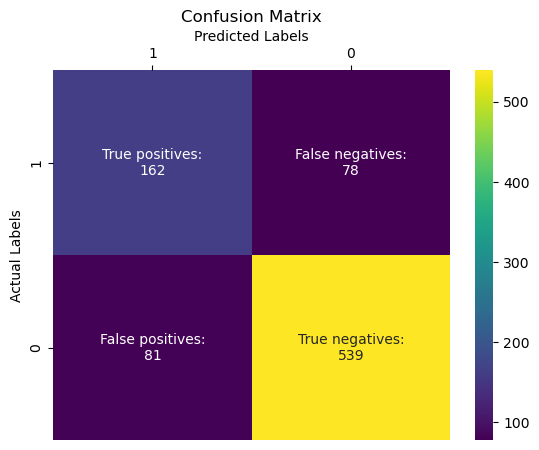

In [27]:
### YOUR CODE HERE
TP,FP,TN,FN = compute_confusion_matrix(model_test_results) # SOLUTION
print(f'TP : {TP}\nFP : {FP}\nTN : {TN}\nFN : {FN}\n') # SOLUTION
draw_confusion_matrix(TP, FP, TN, FN) # SOLUTION

You should obtain an accuracy of: `0.8151162790697675`  
Your confusion matrix should look like the following:
        
<table>
<tr>
    <td>TP = 162</td>
    <td>FN = 78</td>
</tr>
<tr>
    <td>FP = 81 </td>
    <td>TN = 539</td>
</tr>
</table>        
        


<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time!</p>
    <div style="padding: 0 0 2px 10px;">

Compare with the accuracy and confusion matrix you obtained with using the lexicon in [Part 2.1](#Part-2.1:-Using-an-opinion-lexicon).  
What do you think about the performance of the model?
        
</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">
        
The accuracy has roughly doubled compared to the previous technique, which is a great improvement!  
In the confusion matrix, the number of true negatives has increased a lot, and the number of false positives as decreased a lot, which is good!  
However, the number of true positives has decreased and the number of false negatives has increased, which is less good.

</div></div>

### *Task 2: Relative proportions of false positives and false negatives*

One issue with the confusion matrix as presented above is that it shows us absolute numbers, but we actually didn't check how many offensive and non-offensive tweets are in the test dataset, therefore we don't know how well the model actually performs relatively to the contents of the dataset.  
Let's have a look:

In [28]:
counts = model_test_results["label"].value_counts()
print("Number of non-offensive tweets (labelled 0):", counts[0])
print("Number of offensive tweets (labelled 1):", counts[1])

Number of non-offensive tweets (labelled 0): 620
Number of offensive tweets (labelled 1): 240


From the cell above we see there are **way more non-offensive tweets** (labelled 0) than offensive tweets (labelled 1).

To have a clearer idea about the performance of the model, we will now take into account the number of offensive and non-offensive tweets which are in the test dataset, and compare the errors made by the model with these. 
For this, we are going to compute two additional metrics:
* the False Positive Rate (FPR): it represents the proportion of tweets that have been wrongly predicted as offensive compared to all the tweets which are actually non-offensive, therefore it gives us an idea of how many have been **wrongly censored** among non-offensive tweets.
$$FPR = \frac{FP}{FP + TN}$$
* the False Negative Rate (FNR): it represents the proportion of tweets that have been deemed non-offensive compared to all the tweets which are actually offensive, therefore it gives us an idea of how many have **wrongly escaped moderation** among offensive tweets.
$$FNR = \frac{FN}{FN + TP}$$

These two metrics should be the lowest possible.

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Complete the cell below to compute the FPR and FNR for this model.  

</div></div>

In [29]:
def false_positive_rate(TP, FP, TN, FN):
    ### YOUR CODE HERE
    FPR = FP / (FP + TN) # SOLUTION
    
    return FPR

def false_negative_rate(TP, FP, TN, FN):
    ### YOUR CODE HERE
    FNR = FN / (FN + TP) # SOLUTION

    return FNR

Test your functions:

In [30]:
test(false_positive_rate)

🆗 Tests passed ! =)


In [31]:
test(false_negative_rate)

🆗 Tests passed ! =)


Now let's have a look at the FPR and FNR for our deep learning model:

In [32]:
# Load the predictions from the model on the test dataset
comparisons = pd.DataFrame({'prediction': model_test_results["prediction"], 'label': model_test_results["label"]})
TP,FP,TN,FN = compute_confusion_matrix(comparisons)

# Compute the FPR and FND
FPR = false_positive_rate(TP, FP, TN, FN)
FNR = false_negative_rate(TP, FP, TN, FN)

# Display the results
print(f'Proportion of tweets wrongly censored (FPR): {round(FPR*100)}%')
print(f'Proportion of tweets that have wrongly escaped moderation (FNR): {round(FNR*100)}%')

Proportion of tweets wrongly censored (FPR): 13%
Proportion of tweets that have wrongly escaped moderation (FNR): 32%


<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

What do you think about the performance of the model based on these two metrics?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

The FNR is 32%, which means that approximately one third of offensive tweets go unmoderated, which is quite a high proportion.  
In addition, the FNR is twice as high as the FPR (13%), meaning that the model is twice more likely to let offensive tweets go unmoderated than to wrongly censor tweets. 
In a sense, this model is relatively liberal, which may result in more people being exposed to harmful content.  
        
</div></div>

### *Task 3: Use the model to evaluate sample tweets*
In this part of the exercise, you will do a **"reality check"** and get to test the model on some example tweets.  

We will first load the model, then create a function that runs the model on a dataset to get the results.  
Since this exercise is not about deep learning, *you don't need to understand the code below.* You can directly skip to the activity just after.

In [33]:
# Import the libraries we need
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline
from threadpoolctl import ThreadpoolController, threadpool_limits 
controller = ThreadpoolController()

# Optimization: if GPUs are available we use them, if not, we limit the number of threads to avoid loosing performance
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_num_threads(2)

# Loading our pre-trained model
model = AutoModelForSequenceClassification.from_pretrained("RS-course/model-safety-W1").to(device)

# Loading a tokenizer to preprocess the text
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

# Building a pipeline that combines the tokenizer and the model
classifier = pipeline("text-classification", model=model, tokenizer=tokenizer)

# Create a function that generates predictions with the model for an array of content texts
@controller.wrap(limits=2, user_api='blas') # limits the number of threads to 2 to avoid performance loss
def predict(data, classifier): 
    """ Applies the provided classifier to the data and returns a dataframe with the resulting predictions.

    Arguments:
    - data: the data to classify (simple list/array, iterable)
    - classifier: classifying pipeline to use

    Returns:
    - Pandas dataframe with two columns: the texts and the obtained prediction from the model
    """
    items = []
    predictions = []
    
    # for all items in the data
    for item in data:
        # save the item
        items.append(item)
        
        # run the model and save the prediction result
        pred = classifier(item)[0]['label']
        predictions.append('Not offensive' if pred=="LABEL_0" else 'Offensive')

    return pd.DataFrame({'items': items, 'predictions': predictions}) 

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Instructions</p>
    <div style="padding: 0 0 2px 10px;">

Add some tweets to the list in the cell below and evaluate whether the model is able to correctly label them or not.

</div></div>

In [34]:
tweets = [
    "Just spilled coffee over my new shirt. Great start to the day!",
    "Apparently, the secret to success is waking up at 4 am. Guess I'm doomed.",
    "Spent two hours in traffic today. Absolutely loved it.",
    # Add more examples here...
]

predict(tweets, classifier)

items    predictions
0             Just spilled coffee over my new shirt. Great start to the day!  Not offensive
1  Apparently, the secret to success is waking up at 4 am. Guess I'm doomed.  Not offensive
2                     Spent two hours in traffic today. Absolutely loved it.  Not offensive

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

What is your conclusion from this "reality check"? In which cases have you found the model to fail?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

You should be able to observe that the model is quite sensitive to specific terms, which means that tweets containing these terms will be flagged as offensive even if the terms are used in a positive way. The model also tends to fail on subtle formulations.
        
</div></div>

# Conclusion

It is now time to step back and reflect on the implications of what you have discovered in this notebook!

To summarize what you have done, we suggest that you review this notebook and:
* list the different methods you have used to **filter content**
* list the different methods you have used to **measure the quality of your filters**

Then answer these final reflection questions and check your reasoning.

<div style="border-left: 6px solid rgba(255, 193, 7, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(255, 193, 7, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">Final reflection time !</p>
    <div style="padding: 0 0 2px 10px;">

Q1) What are the implication of a toxic content filter predicting a lot of **false positives** ?  

Q2) What are the implication of a toxic content filter predicting a lot of **false negatives** ?  

Q3) What should be prioritize when implementing a content moderation algorithm ?
- [ ] Reduce the toxic content
- [ ] Respect freedom of speech
- [ ] None

Bonus) To train our model that detects offensive content, we have used a dataset that includes labels that represent the "ground truth". What type of issues could there be with these labels ?

</div></div>

<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(40, 167, 69, 0.1); padding: 8px 0 8px 15px;"><strong>Feedback</strong> - Click on the "..." below <u>only once you have really tried to answer the question!</u></p>
</div>


<div style="border-left: 6px solid rgba(40, 167, 69, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <div style="padding: 0 0 2px 10px;">

Q1) By predicting a lot of false positives, the filter flags innocent content. The platform will probably not respect the freedom of speech of its users.

Q2) By predicting a lot of false negatives, the filter misses toxic content. The platform can potentially be flowed by toxic content.

Q3) None, the balance between the two is key !

Bonus) Having the "ground truth" comes with the process of data labelling, usually done by human experts. In the context of offensive content, it means that some humans had to read thousands of tweets ranging from very neutral to very offensive, with the possible desastrous psychological consequences on them (racial, homophobic content for instance).

</div></div>

# Congratulations! You have finished this notebook!

---

<div style="border-left: 6px solid rgba(69, 157, 185, 1);border-radius:5px; box-shadow: 3px 3px 3px rgba(221, 221, 221, 1);" >
    <p style="background-color: rgba(69, 157, 185, 0.1); font-weight:bold; padding: 8px 0 8px 15px;">To go further with Machine Learning and NLP</p>
    <div style="padding: 0 0 2px 10px;">

- **What is Machine Learning (ML)?**

Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy. 

ML involves the use of algorithms and statistical models to enable systems to **learn from data**, identify patterns, and make predictions or decisions without explicit programming. It encompasses various techniques, including supervised and unsupervised learning, aiming to optimize performance as it learns from data and experiences.

- **What is Natural Language Processing (NLP)?**

Natural Language Processing (NLP) refers to the field of artificial intelligence concerned with enabling computers to understand, interpret, and generate human language. It involves algorithms and models that allow machines to interact with human language in a meaningful way. This field encompasses tasks like language translation, `sentiment analysis`, text summarization, and more.

The models used in NLP, and especially the now very popular Large Language Models (LLMs), leverage deep learning techniques and vast amounts of data to understand and generate human-like text. They're trained on **massive datasets** and can generate coherent and contextually relevant text, making them useful for various NLP tasks and applications. For example, GPT-3, one of the largest models, has 175 billion parameters!

**Handling model size :**

To deal with the colossal size of these models, we use techniques like loading pretrained models. It's like giving your computer a head start in learning by providing it with a foundation of knowledge from existing models, and then training it for specific tasks (fine-tuning).

The utilization of open-source models and datasets, particularly through platforms like [Hugging Face](https://huggingface.co/models), has revolutionized the accessibility and advancement of NLP. Hugging Face provides a repository of pre-trained language models and a collaborative space for sharing and fine-tuning these models. Leveraging these models significantly reduces the need to train large models from the ground up, saving time, computational resources, and costs.

</div></div>